## Exercício de Aprofundamento - Trilha 7 

Faça as manipulações e explorações visuais de acordo com as perguntas que precisam ser respondidas

## Análise de dados da NFL 

In [1]:
install.packages("nflfastR")
#install.packages("ggimage")
install.packages("imager")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’, ‘snakecase’, ‘fastrmodels’, ‘furrr’, ‘future’, ‘janitor’, ‘progressr’, ‘xgboost’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bmp’, ‘tiff’, ‘png’, ‘jpeg’, ‘readbitmap’, ‘downloader’, ‘igraph’




In [4]:
library(nflfastR)

library(tidyverse)
library(ggplot2)

library(imager)
#library(ggimage)

In [5]:
temporada <- load_pbp(2014) #Carregamento dos dados, jogada a jogada, de 2014

# **Manipulação de Dados**

In [6]:
timeEscolhido <- 'SEA'

jogosTimeEscolhido <- temporada %>% filter(home_team == timeEscolhido | away_team == timeEscolhido)

table(jogosTimeEscolhido$away_team, jogosTimeEscolhido$week)

     
        1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  ARI   0   0   0   0   0   0   0   0   0   0 154   0   0   0   0   0   0   0
  CAR   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 167   0
  DAL   0   0   0   0 173   0   0   0   0   0   0   0   0   0   0   0   0   0
  DEN   0   0 203   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  GB  172   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 192
  LA    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 163   0   0
  LV    0   0   0   0   0   0   0 196   0   0   0   0   0   0   0   0   0   0
  NE    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  NYG   0   0   0   0   0   0   0   0 172   0   0   0   0   0   0   0   0   0
  SEA   0 167   0 177   0 168 157   0   0 167   0 164 182   0 202   0   0   0
  SF    0   0   0   0   0   0   0   0   0   0   0   0   0 164   0   0   0   0
     
       21
  ARI   0
  CAR   0
  DAL   0
  DEN   0
  

In [7]:
jogo <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           home_team, away_team, away_score, home_score, total
          )

In [8]:
acoesJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           rush_attempt, pass_attempt, field_goal_attempt, down, time, qtr, ydstogo, yards_gained
          )

In [9]:
pontuacaoJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           posteam, defteam, posteam_score, defteam_score, rush, pass, passer, rusher, receiver, interception, play_type, pass_length, air_yards, kick_distance, drive, touchdown, td_team, name
          )

In [10]:
descricaoJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           desc, passer_player_name, passing_yards, receiver_player_name, punt_returner_player_name        
          )

In [ ]:
head(jogo)
head(acoesJogadas)
head(pontuacaoJogadas)
head(descricaoJogadas)

# **Desafios de manipulação de dados**

Com base no dataset específico **pontuacaoJogadas**, apresente os dados somente quando ouve *rush* ou *pass* na jogada. Garanta que exista também o nome ou abreviatura do time que está atacando (variável *posteam*), além dos nomes dos jogadores que estão fazendo passe,  correndo ou recebendo a bola (variáveis *passer*, *rusher* e *receiver*)

In [11]:
pontuacaoJogadas %>%
  filter (rush == 1 | pass == 1) %>%
  select (posteam, rush, pass, passer, rusher, receiver) %>%
  head(5)

posteam,rush,pass,passer,rusher,receiver
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
GB,1,0,NA,E.Lacy,NA
GB,1,0,NA,E.Lacy,NA
GB,1,0,NA,E.Lacy,NA
GB,1,0,NA,J.Starks,NA
GB,0,1,A.Rodgers,NA,J.Nelson


Utilizando o subconjunto de dados **acoesJogadas** e **pontuacaoJogadas**, crie uma análise que retorne qual foi o jogador que conquistou mais jardas no terceiro quarto.

In [12]:
passer <- acoesJogadas %>%
  inner_join(pontuacaoJogadas, by = 'play_id') %>%
  select(play_id, qtr, time, yards_gained, passer) %>%
  filter(qtr==3) %>%
  group_by(passer) %>%
  summarise(yards_gained = sum(yards_gained)) %>%
  arrange(desc(yards_gained))

passer <- rename(passer, 'Player Name' = passer)
head(passer)


Player Name,yards_gained
<chr>,<dbl>
R.Wilson,48
A.Rodgers,23
NA,NA


Considerando apenas os jogadores que fazem passe, o jogador que correu mais jardas foi o R. Wilson

In [13]:
rusher <- acoesJogadas %>%
  inner_join(pontuacaoJogadas, by = 'play_id') %>%
  select(play_id, qtr, time, yards_gained, rusher) %>%
  filter(qtr==3) %>%
  group_by(rusher) %>%
  summarise(yards_gained = sum(yards_gained)) %>%
  arrange(desc(yards_gained))

rusher <- rename(rusher, 'Player Name' = rusher)
head(rusher)

Player Name,yards_gained
<chr>,<dbl>
M.Lynch,34
P.Harvin,16
R.Turbin,9
E.Lacy,2
NA,NA


Considerando apenas os jogadores que correm, o jogador que correu mais jardas foi o M. Lynch

In [14]:
receiver1 <- acoesJogadas %>%
  inner_join(pontuacaoJogadas, by = 'play_id') %>%
  select(play_id, qtr, time, yards_gained, receiver) %>%
  filter(qtr==3) %>%
  group_by(receiver) %>%
  summarise(yards_gained = sum(yards_gained)) %>%
  arrange(desc(yards_gained))

receiver1 <- rename(receiver1, 'Player Name' = receiver)
head(receiver1)

Player Name,yards_gained
<chr>,<dbl>
R.Cobb,23
Z.Miller,18
J.Nelson,14
P.Harvin,11
D.Baldwin,6
J.Kearse,0


Considerando apenas os jogadores que recebem o passe, o jogador que correu mais jardas foi o R. Cobb



In [23]:
geral <- passer %>%
  full_join(rusher, by ='Player Name') %>%
  full_join(receiver1, by = 'Player Name') %>%
  replace_na(list(yards_gained.x = 0, yards_gained.y = 0, yards_gained =0)) 

In [26]:
geral %>%
  mutate(geral, jardas_ganhas = yards_gained.x + yards_gained.y + yards_gained) %>%
  select ('Player Name',jardas_ganhas) %>%
  arrange(desc(jardas_ganhas))

Player Name,jardas_ganhas
<chr>,<dbl>
R.Wilson,48
M.Lynch,34
P.Harvin,27
A.Rodgers,23
R.Cobb,23
Z.Miller,18
J.Nelson,14
R.Turbin,9
D.Baldwin,6


**Conclusão:**

Considerando todos os jogadores, o jogador que mais conquistou jardas no 3 quarters, somando todas as jogadas, foi R. Wilson

Não tenho um conhecimento de como funciona muito bem o futebol americano, talvez essa sepração entre Passer, Rusher e Receiver, não faça sentido para a análise, porém achei interessante até para exercitar o Group By e Summarise

# **Desafio de geração de gráfico**

Crie um gráfico de linhas, mostrando a pontuação de cada time em cada *quarter*. O resultado deve ter duas linhas, uma para cada time, e cada linha será composta pela pontuação de cada um dos *quarters* sendo uma cor para cada time. O eixo X terá os *quarters* e o eixo y terá a pontuação.

# A tibble: 8 × 3
# Groups:   qtr, posteam [8]
    qtr posteam posteam_score
  <dbl> <chr>           <dbl>
1     1 GB                  6
2     2 GB                 10
3     3 GB                 10
4     4 GB                 16
5     1 SEA                 3
6     2 SEA                17
7     3 SEA                22
8     4 SEA                36


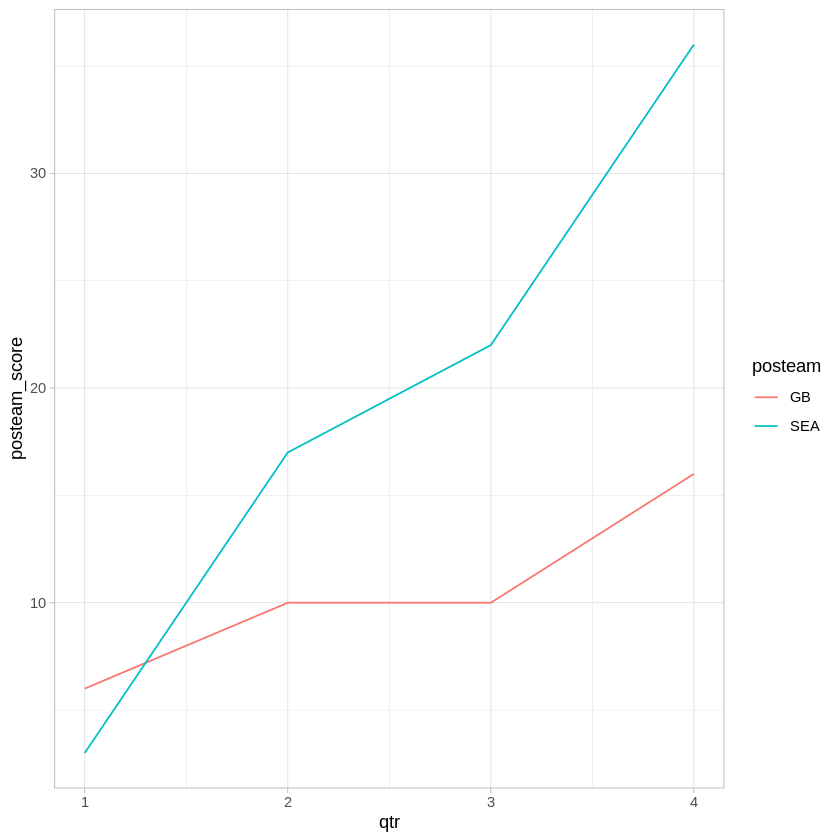

In [32]:
pontos <- acoesJogadas %>%
    inner_join(pontuacaoJogadas, by='play_id') %>%
    select(qtr, posteam, posteam_score) %>%
    group_by(qtr, posteam) %>%
    filter(posteam_score == max(posteam_score)) %>%
    arrange(posteam) %>%
    unique()

print(pontos)

ggplot(pontos, aes(x = qtr, y = posteam_score, col=posteam)) + geom_line() + theme_light()


Crie um gráfico de barras empilhada (colunas verticais), utilizando somente as jogadas que tiveram entre 10 e 20 jardas conquistas.
O empilhamento das barras será feito pela quantidade de jardas conquistadas (entre 10 e 20). Mantenha as barras verticais segmentadas por quarter do jogo, e por fim, crie a faceta baseada nos times.


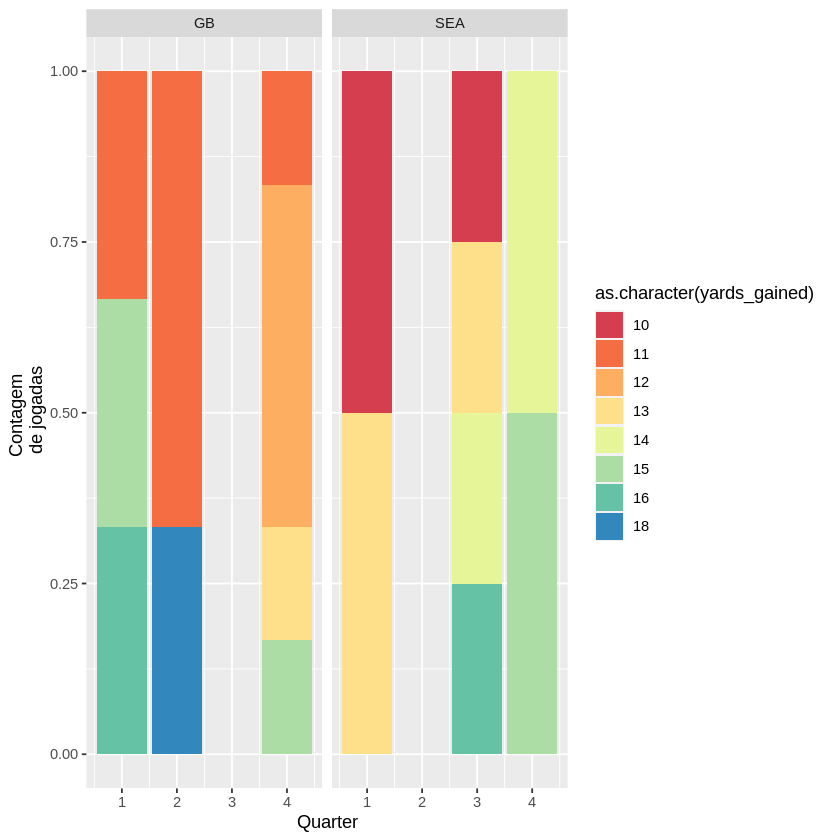

In [44]:
jardasconquis <- acoesJogadas %>%
    inner_join(pontuacaoJogadas, by='play_id') %>%
    filter(yards_gained >= 10 & yards_gained < 20 ) %>%
    select(posteam,qtr,yards_gained)

#print(jardasconquis)

ggplot(jardasconquis, aes(qtr, fill = as.character(yards_gained))) +
xlab ('Quarter')+
ylab ('Contagem \n de jogadas')+
geom_bar(position = "fill") +
facet_grid(. ~ posteam) + 
scale_fill_brewer (palette = 'Spectral')

